In [1]:
# Part 1: Understanding Product Categories

# Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [2]:
# Import libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Import dataframe

df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
df.sample(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1134479,1255362,B0BZSX9TKK,Black And Gold No Parking and Comes With a Per...,4.5,5,6.99,False,0,Safety & Security
1790649,2015156,B0933MHBF2,"ZGZYL Men's Smart Watch, Bluetooth Call, Direc...",0.0,0,57.58,False,0,Sports & Outdoors
1537705,1733648,B0C1MK6FSD,"Fishing chest waders Unisex, Full Body Rubber ...",0.0,0,203.99,False,0,Sports & Outdoors
433829,466314,B07416WGNP,YALI Lace Halter Neck Hanging Flower Print Dre...,0.0,0,15.70,False,0,Sports & Outdoors
519372,558659,B0C3BTPV4R,QWUVEDS Women's Sleeves Casual Flowers Long Pr...,0.0,0,7.17,False,0,Sports & Outdoors


In [5]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [6]:
# uid = Unique identifier for each row. (type: int)

# asin = Product ID from Amazon. (type: str)

# title = Title of the product. (type: str)

# stars = Product rating. If 0, no ratings were found. (type: float)

# reviews = Number of customer reviews. If 0, no reviews were found. (type: int)

# price = Price of the product. (type: float, Currency: GBP)

# isBestSeller = Product category. (type: str)

# boughtInLastMonth = Whether the product had the Amazon BestSeller status or not. (type: bool)

# category = Indicates how many products we sold last month. (type: int)

In [7]:
# Frequency Tables:
    
    # Generate a frequency table for the product `category`.

# Catergory is a qualitiative variable

frequency_table = df["category"].value_counts()
frequency_table.reset_index()

    # Which are the top 5 most listed product categories?

frequency_table.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Skin Care'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Hair Care'),
  Text(9, 0, 'Fragrances')])

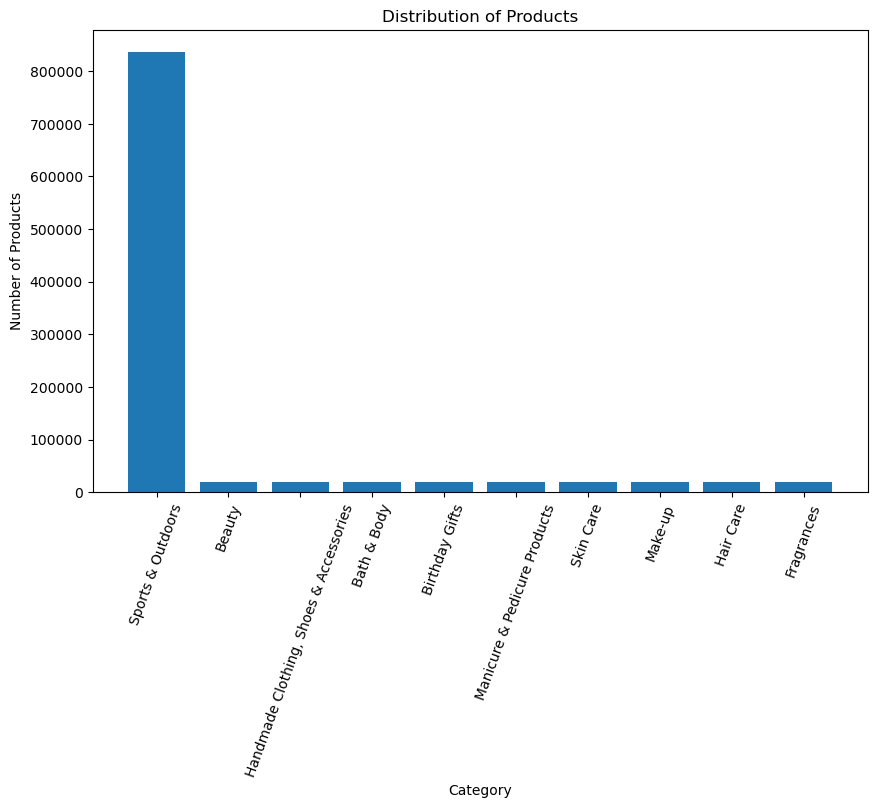

In [8]:
# Visualizations:
    
    # Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*


category_counts = df["category"].value_counts().head(10)


plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Distribution of Products")
plt.xticks(rotation=70)

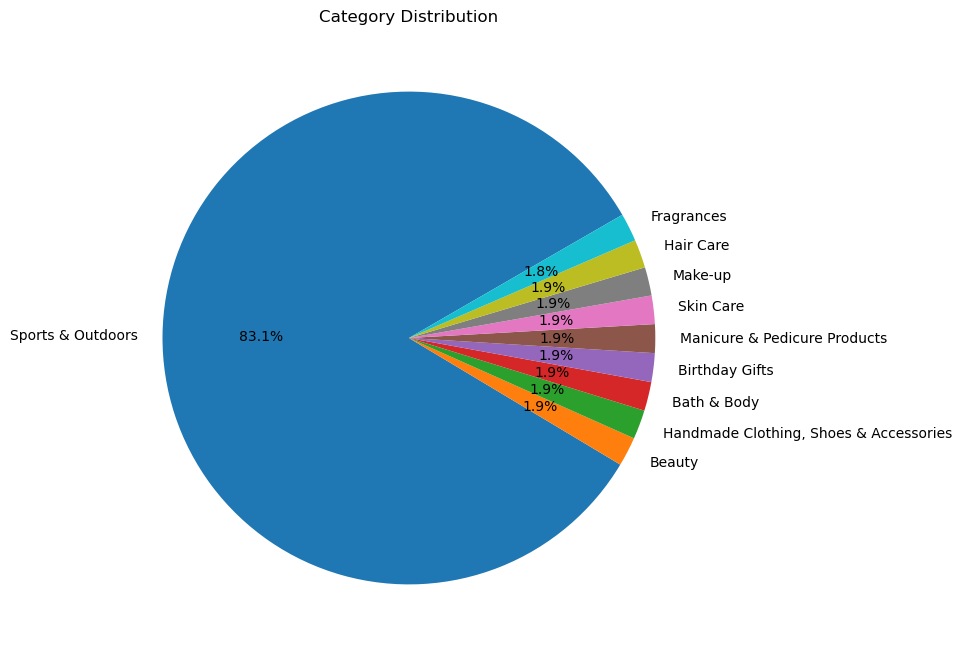

In [9]:
    # For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

pie_chart_category_counts = df['category'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(pie_chart_category_counts, labels=pie_chart_category_counts.index, autopct='%1.1f%%', startangle=30)
plt.title('Category Distribution')
plt.show()

# Sport & Outdoors dominates
# It's strange that all the other catergories are identical, suggests this could be corrupted.

In [10]:
# Part 2: Delving into Product Pricing

# Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [11]:
# 1. Measures of Centrality:

    # Calculate the mean, median, and mode for the `price` of products.

df['price'].describe().apply(lambda x: f"{x:,.2f}")

count    2,443,651.00
mean            89.24
std            345.61
min              0.00
25%              9.99
50%             19.09
75%             45.99
max        100,000.00
Name: price, dtype: object

In [12]:
df['price'].mode()

0    9.99
Name: price, dtype: float64

In [13]:
# Mean = 89.24, Median = 19.09, Mode = 9.99

In [14]:
    # What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [15]:
# The average/mean is 89.24, which is significantlly higher than the mode. This suggests that the dataset has some high-value outliers (e.g. the max value 100,000. Also need to check the min value, 0.00. It doesn't make sense for an online retailer to see products at no cost.

In [21]:
# 2. Measures of Dispersion:
   
    # Determine the variance, standard deviation, range, and interquartile range for product `price`.

df['price'].var()

119445.4853225653

In [23]:
45.99 - 9.99

36.0

In [ ]:
# variance = 119445, standard deviation = 345.61, range = 100,000, IQ range = 36.0

In [25]:
    # How varied are the product prices? Are there any indicators of a significant spread in prices?

# Very high variance in the dataset, indicating that prices vary significantly, confirming earlier note about high-value outliers.

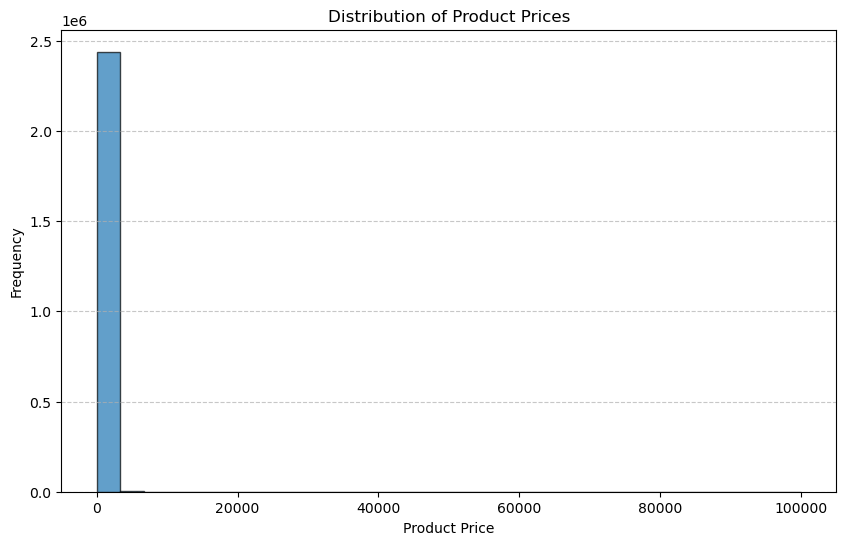

In [27]:
# 3. Visualizations:

    # Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

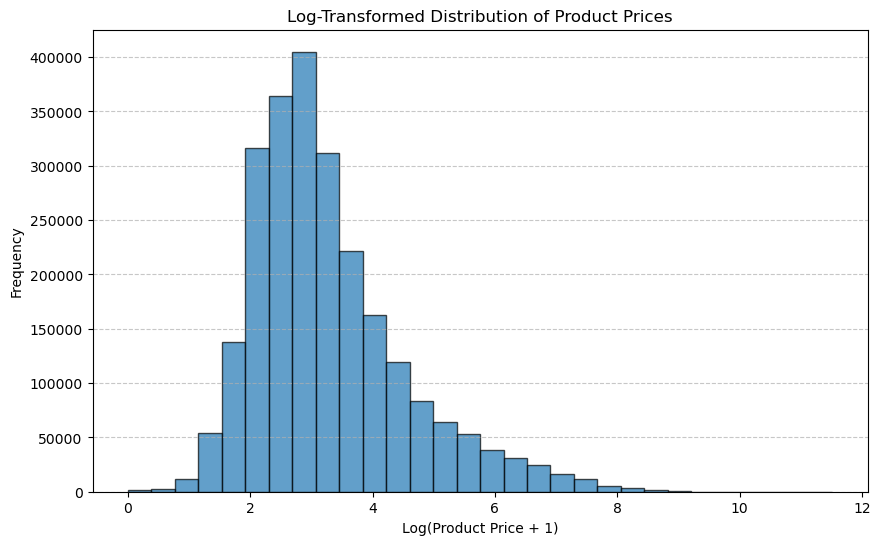

In [31]:
# Very hard to read this histiogram, because most values clustered near zero. We can instead use a log-transformed graph.

plt.figure(figsize=(10, 6))
plt.hist(np.log1p(df['price']), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Log(Product Price + 1)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Product Prices')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


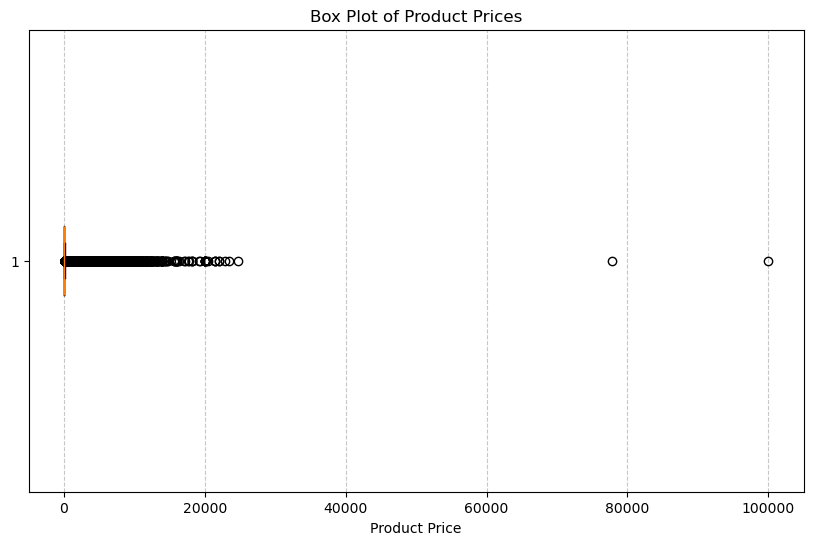

In [33]:
    # Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False)
plt.xlabel('Product Price')
plt.title('Box Plot of Product Prices')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# 2 extreme outliers in the data set around 80K and 100K.

In [37]:
# Part 3: Unpacking Product Ratings

    # Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [57]:
# 1. Measures of Centrality:
    
    # Calculate the mean, median, and mode for the `rating` of products.

df['stars'].describe().apply(lambda x: f"{x:,.2f}")

count    2,443,651.00
mean             2.15
std              2.19
min              0.00
25%              0.00
50%              0.00
75%              4.40
max              5.00
Name: stars, dtype: object

In [59]:
df['stars'].mode()

0    0.0
Name: stars, dtype: float64

In [61]:
# Mean = 2.15, Median = 0, Mode = 0

In [65]:
# 0 = no ratings were found. How does it look if we drop these?

without_0_stars = df[df['stars'] != 0] 
without_0_stars['stars'].describe().apply(lambda x: f"{x:,.2f}")

count    1,218,010.00
mean             4.32
std              0.56
min              1.00
25%              4.10
50%              4.40
75%              4.60
max              5.00
Name: stars, dtype: object

In [67]:
    # How do customers generally rate products? Is there a common trend?

# Most customers opt no to rate products, the dataframe is postiviely skewed. When customers do rate products, it is overwhelmingly positive, with a mean of 4.32.

In [69]:
# 2. Measures of Dispersion:
    
# Determine the variance, standard deviation, and interquartile range for product `rating`.

df['stars'].var()

4.81743402976196

In [73]:
4.40 - 0

4.4

In [ ]:
# variance = 4.82, standard deviation = 2.19, IQ range = 4.4

In [75]:
    # Are the ratings consistent, or is there a wide variation in customer feedback?

# See above (cell 67).

In [79]:
# 3. Shape of the Distribution:
    
    # Calculate the skewness and kurtosis for the `rating` column. 

skewness = df['stars'].skew()
kurtosis = df['stars'].kurtosis()

In [81]:
skewness

0.08120735761080985

In [83]:
kurtosis

-1.9260061280432985

In [85]:
    # Are the ratings normally distributed, or do they lean towards higher or lower values?

# Ratings are not normally distributed, instead leaning towards lower values.

In [87]:
# 4. Visualizations:

# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

([<matplotlib.axis.XTick at 0x32ee320c0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

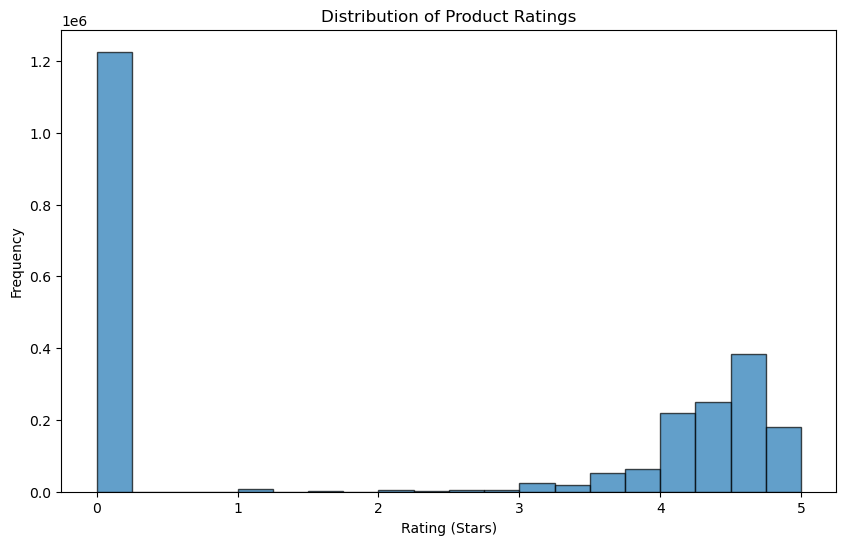

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(df['stars'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Frequency')
plt.xticks(range(0, 6))

In [ ]:
# 0 is the most common rating.